<a href="https://colab.research.google.com/github/Youssef-Rafikk/CODSOFT/blob/main/Task_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
#-------------------------------------------------------------------------------------------------------------------------------#

# Load the dataset:
df = pd.read_csv('/content/Titanic-Dataset.csv')
#-------------------------------------------------------------------------------------------------------------------------------#

# Display dataset:
print("Dataset Information:")
print(df.info())
print("\nFirst few rows of the dataset:")
print(df.head())
#-------------------------------------------------------------------------------------------------------------------------------#

# Define features and target variable:
X = df.drop('Survived', axis=1)
y = df['Survived']
#-------------------------------------------------------------------------------------------------------------------------------#

# Preprocess the data:
categorical_features = ['Pclass', 'Sex', 'Embarked']
numerical_features = ['Age', 'SibSp', 'Parch', 'Fare']

# Create preprocessing pipelines:
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])
#-------------------------------------------------------------------------------------------------------------------------------#

# Combine preprocessing:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)])

# Create the model pipeline
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', RandomForestClassifier(random_state=42))])
#-------------------------------------------------------------------------------------------------------------------------------#

# Split train and test:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
#-------------------------------------------------------------------------------------------------------------------------------#

# Evaluate the model:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("\nModel Evaluation:")
print(f'Overall Accuracy: {accuracy:.2f}')
print('\nConfusion Matrix:')
print(conf_matrix)
print('\nClassification Report:')
print(class_report)
#-------------------------------------------------------------------------------------------------------------------------------#

# Evaluate accuracy for different subgroups | by gender:
test_set_with_predictions = X_test.copy()
test_set_with_predictions['Survived'] = y_test
test_set_with_predictions['Predicted'] = y_pred

print("\nAccuracy by Gender:")
for group in test_set_with_predictions['Sex'].unique():
    group_data = test_set_with_predictions[test_set_with_predictions['Sex'] == group]
    group_accuracy = accuracy_score(group_data['Survived'], group_data['Predicted'])
    print(f'Accuracy for {group}: {group_accuracy:.2f}')
#-------------------------------------------------------------------------------------------------------------------------------#

# Pclass:
print("\nAccuracy by Passenger Class:")
for group in test_set_with_predictions['Pclass'].unique():
    group_data = test_set_with_predictions[test_set_with_predictions['Pclass'] == group]
    group_accuracy = accuracy_score(group_data['Survived'], group_data['Predicted'])
    print(f'Accuracy for Pclass {group}: {group_accuracy:.2f}')


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

First few rows of the dataset:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4     

Feature Importances:
       Feature  Importance
0          Age    0.249814
3         Fare    0.246854
8     Sex_male    0.144579
7   Sex_female    0.141251
6     Pclass_3    0.051007
1        SibSp    0.048696
2        Parch    0.036386
4     Pclass_1    0.025770
5     Pclass_2    0.019819
11  Embarked_S    0.015537
9   Embarked_C    0.012449
10  Embarked_Q    0.007837


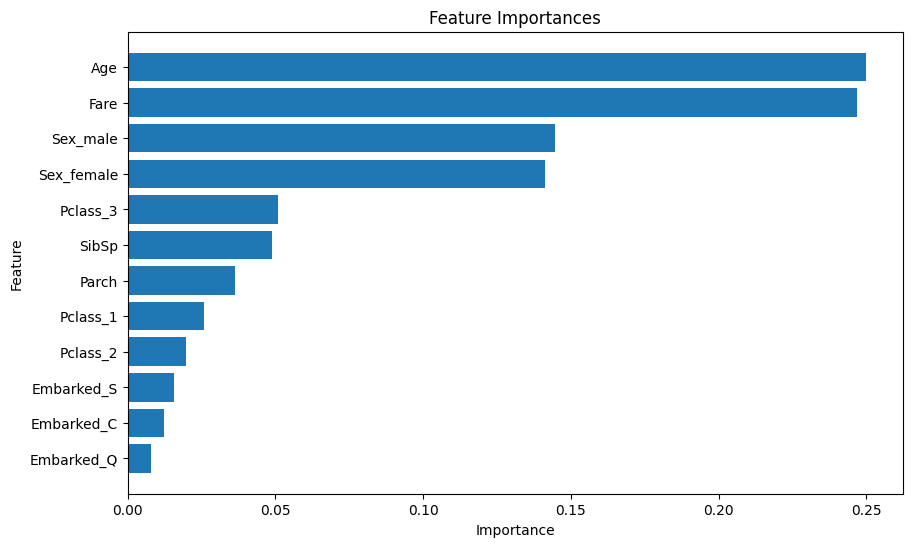

In [17]:
import matplotlib.pyplot as plt

feature_importances = model.named_steps['classifier'].feature_importances_
feature_names = preprocessor.transformers_[0][2] + preprocessor.transformers_[1][1].named_steps['onehot'].get_feature_names_out(categorical_features).tolist()

importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

print("Feature Importances:")
print(importance_df)

plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.gca().invert_yaxis()
plt.show()
